# ¿Qué vende un coche?

Eres un analista en Crankshaft List. Cientos de anuncios gratuitos de vehículos se publican en tu sitio web cada día. Necesitas estudiar los datos recopilados durante los últimos años y determinar qué factores influyen en el precio de un vehículo.
- Tabla de Contenido 
    - Exploración de datos
    - Tratar valores ausentes
    - Corregir tips de datos
    - Enriqueceer datos
    - Estudiar valores atipicos
    - Periodo de colocacion de los anuncios
    - Precio promedio por cada tipo de vehiculo
    - Factores que afectan el precio

## Inicialización

In [1]:
# Cargar todas las librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Cargar datos

In [2]:
# Carga el archivo de datos en un DataFrame

df = pd.read_csv('/datasets/vehicles_us.csv')

### Explorar datos iniciales

El dataset contiene los siguientes campos:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gasolina, diesel, etc.
- `odometer` — el millaje del vehículo cuando el anuncio fue publicado
- `transmission`
- `paint_color`
- `is_4wd` — si el vehículo tiene tracción a las 4 ruedas (tipo Booleano)
- `date_posted` — la fecha en la que el anuncio fue publicado
- `days_listed` — desde la publicación hasta que se elimina



In [3]:
# información general/resumida sobre el DataFrame

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB
None


In [56]:
# muestra de datos

print(df.sample(5))

       price  model_year                  model  condition  cylinders fuel  \
18053  14995        2014    chevrolet silverado          4          6  gas   
15033   2895        2001      toyota highlander          2          6  gas   
6776    6995        2013          dodge charger          2          8  gas   
44488  13000        2012  ford f-250 super duty          3          8  gas   
9956   18490        2012               ram 1500          3          8  gas   

       odometer transmission    type  paint_color  is_4wd date_posted  \
18053    174240    automatic   truck        white    True  2018-07-01   
15033    129000    automatic     SUV       silver   False  2019-02-04   
6776     179000    automatic   sedan  Desconocido   False  2018-11-19   
44488    173000    automatic  pickup        white    True  2019-03-20   
9956      44786    automatic   truck        black   False  2018-06-10   

       days_listed  year_posted  years_old  miles_mean  
18053           29         2018    

In [5]:
# Cantidad de valores ausentes 
df.isna().sum().sort_values()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

Se observa los valores ausentes en las columnas model_year, cylinders, odometer, paint_color, is_4wd.
La mayor cantidad de valores ausentes se encuentra en is_4wd. La siguiente variable con mayor cantidad de valores es paint_color.


Hay columnas con datos inapropiados en model_year es tipo float64 y deberia ser un entero.
La columna is_4wd es tipo de float64 pero los valores son true o false.


### Conclusiones y siguientes pasos


En la columna is_4wd reemplazare los valores NAN entonces los valores NAN deberian ser 0.

Reemplazare los datos de la columna, agrupare los datos segun el tipo de vehiculo ya que # de cilindros deberia ser similar segun el tipo de auto.

Hipotesis: En la columna model_year completare los valores ausentes con la mediana de los los valores de años agrupados por modelo de carro.


# Tratar los valores ausentes (si hay)

- Reemplace la mediana de los valores de la columna cylinder en los valores ausentes agrupados por el tipo de vehiculos.

In [6]:
 
def replace_cilindro(df):
    median_cil=df.groupby('type')['cylinders'].median()
    
    df.loc[(df['type']=='bus')& df['cylinders'].isna(),'cylinders']= median_cil.loc['bus']
    df.loc[(df['type']=='convertible')& df['cylinders'].isna(),'cylinders']= median_cil.loc['convertible']
    df.loc[(df['type']=='coupe')& df['cylinders'].isna(),'cylinders']= median_cil.loc['coupe']
    df.loc[(df['type']=='hatchback')& df['cylinders'].isna(),'cylinders']= median_cil.loc['hatchback']
    df.loc[(df['type']=='mini-van')& df['cylinders'].isna(),'cylinders']= median_cil.loc['mini-van']
    df.loc[(df['type']=='offroad')& df['cylinders'].isna(),'cylinders']= median_cil.loc['offroad']
    df.loc[(df['type']=='other')& df['cylinders'].isna(),'cylinders']= median_cil.loc['other']
    df.loc[(df['type']=='pickup')& df['cylinders'].isna(),'cylinders']= median_cil.loc['pickup']
    df.loc[(df['type']=='sedan')& df['cylinders'].isna(),'cylinders']= median_cil.loc['sedan']
    df.loc[(df['type']=='SUV')& df['cylinders'].isna(),'cylinders']= median_cil.loc['SUV']
    df.loc[(df['type']=='truck')& df['cylinders'].isna(),'cylinders']= median_cil.loc['truck']
    df.loc[(df['type']=='van')& df['cylinders'].isna(),'cylinders']= median_cil.loc['van']
    df.loc[(df['type']=='wagon')& df['cylinders'].isna(),'cylinders']= median_cil.loc['wagon']
    return df



In [7]:
#comprobando si funciono
replace_cilindro(df).loc[9]


price                  9200
model_year           2008.0
model           honda pilot
condition         excellent
cylinders               6.0
fuel                    gas
odometer           147191.0
transmission      automatic
type                    SUV
paint_color            blue
is_4wd                  1.0
date_posted      2019-02-15
days_listed              17
Name: 9, dtype: object

- Reemplazare los valores NAN por "0" en la columna 'is_4wd'. Teniendo en cuenta que son datos booleanos.

In [8]:

df['is_4wd'] = df['is_4wd'].fillna(value=0)

#comprobando si funciono
print(df.head(5))


   price  model_year           model  condition  cylinders fuel  odometer  \
0   9400      2011.0          bmw x5       good        6.0  gas  145000.0   
1  25500         NaN      ford f-150       good        6.0  gas   88705.0   
2   5500      2013.0  hyundai sonata   like new        4.0  gas  110000.0   
3   1500      2003.0      ford f-150       fair        8.0  gas       NaN   
4  14900      2017.0    chrysler 200  excellent        4.0  gas   80903.0   

  transmission    type paint_color  is_4wd date_posted  days_listed  
0    automatic     SUV         NaN     1.0  2018-06-23           19  
1    automatic  pickup       white     1.0  2018-10-19           50  
2    automatic   sedan         red     0.0  2019-02-07           79  
3    automatic  pickup         NaN     0.0  2019-03-22            9  
4    automatic   sedan       black     0.0  2019-04-02           28  


- Los valores ausentes de la columna de modelyear, los rellenos con la mediana agrupados por el modelo de auto.

In [9]:
 
def modelyear_median(df, col, group_col):
    median = df.groupby(group_col)[col].median()
    return df[col].fillna(df[group_col].map(median))
  

In [10]:
df['model_year'] = modelyear_median(df, 'model_year', 'model')


- Completé los valores nulos con la mediana de millas agrupados por su condición, basada en la hipotesis de que existe una relacion entre la condición del auto y las millas que recorrio.

In [11]:
def fill_odometer(df):
    median_miles=df.groupby('condition')['odometer'].median()
    
    df.loc[(df['condition']=='excellent')& df['odometer'].isna(),'odometer']= median_miles.loc['excellent']
    df.loc[(df['condition']=='fair')& df['odometer'].isna(),'odometer']= median_miles.loc['fair']
    df.loc[(df['condition']=='good')& df['odometer'].isna(),'odometer']= median_miles.loc['good']
    df.loc[(df['condition']=='like new')& df['odometer'].isna(),'odometer']= median_miles.loc['like new']
    df.loc[(df['condition']=='new')& df['odometer'].isna(),'odometer']= median_miles.loc['new']
    df.loc[(df['condition']=='salvage')& df['odometer'].isna(),'odometer']= median_miles.loc['salvage']
    return df

fill_odometer(df).loc[51452]



price                               5495
model_year                        2003.0
model           chevrolet silverado 1500
condition                      excellent
cylinders                            8.0
fuel                                 gas
odometer                        104230.0
transmission                   automatic
type                              pickup
paint_color                          NaN
is_4wd                               1.0
date_posted                   2019-01-14
days_listed                           34
Name: 51452, dtype: object

- Reemplazare los datos vacio de la columna paint color por 'Desconocido' ya que no logro relacionar otra variable con el color del auto y comprobare que funciono sumando los valores nulos de la columna.

In [12]:
df['paint_color']=df['paint_color'].fillna('Desconocido')

In [13]:
df['paint_color'].isnull().sum()

0

- A continuacion, muestro información del dataset sin valores ausentes.

In [14]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB
None


## Corregir los tipos de datos

Voy a corregir:
- año del modelo, porque debe ser un entero. 
- is_4wd porque deberia ser booleano porque solo tiene dos opciones.
- cylinders tambien debe ser un entero.
- date_posted porque deberia tener un formato de fecha para luego extraer el año.

Se tiene que corregir los datos ya que para el analisis posterior se necesitan ciertos tipos de datos, como fecha y entero.

In [15]:
df['model_year'] = df['model_year'].astype(int)
df['is_4wd'] = df['is_4wd'].astype(bool)
df['odometer'] =df['odometer'].astype(int)
df['cylinders'] = df['cylinders'].astype(int)
df['date_posted'] = pd.to_datetime(df['date_posted'])


In [16]:

print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int64         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  int64         
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  int64         
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  bool          
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: bool(1), datetime64[ns](1), int64(5), object(6)
memory usage: 4.8+ MB
None


## Enriquecer datos

In [17]:
# Agrega valores de fecha y hora para cuando se colocó el anuncio
df['year_posted'] = df['date_posted'].dt.year


In [18]:
# Agrega los años del vehículo cuando el anuncio se colocó

df['years_old'] = df['year_posted']-df['model_year']


In [19]:
# Agrega el millaje promedio del vehículo por año

df['miles_mean'] = df['odometer']/df['years_old']

In [20]:
# Podría ser útil reemplazar los valores de condición con algo que se pueda manipular más fácilmente

df['condition'] = df['condition'].replace({'new':'5', 'like new': '4', 'excellent':'3', 'good':'2','fair':'1','salvage':'0'})

print(df['condition'].value_counts())



3    24773
2    20145
4     4742
1     1607
5      143
0      115
Name: condition, dtype: int64


In [21]:
#Cambiar el tipo de condition ahora que se convirtio en una escala de 0 al 5
df['condition'] =df['condition'].astype(int)

## Comprobar datos limpios

Los datos se muestran corregidos y en la columna miles_mean muestra vaores nulos. 

In [22]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int64         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  int64         
 4   cylinders     51525 non-null  int64         
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  int64         
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  bool          
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
 13  year_posted   51525 non-null  int64         
 14  years_old     51525 non-null  int64         
 15  miles_mean    51523 non-null  float6

In [23]:
#Para lograr que miles mean se muestre un histograma no debe tener valores nulos ni valores no numéricos, valores faltantes (NaN)
#o valores infinitos (inf)
#por ello voy rellenar los dos valores NaN y reemplazar todos los valores a enteros
df['miles_mean'] = df['miles_mean'].fillna(0)
df['miles_mean'] = df['miles_mean'].replace([np.inf, -np.inf, np.nan], 0)
df['miles_mean'] = df['miles_mean'].astype(int)

In [24]:
# imprimir una muestra de datos

print(df.head(5))

   price  model_year           model  condition  cylinders fuel  odometer  \
0   9400        2011          bmw x5          2          6  gas    145000   
1  25500        2011      ford f-150          2          6  gas     88705   
2   5500        2013  hyundai sonata          4          4  gas    110000   
3   1500        2003      ford f-150          1          8  gas    181613   
4  14900        2017    chrysler 200          3          4  gas     80903   

  transmission    type  paint_color  is_4wd date_posted  days_listed  \
0    automatic     SUV  Desconocido    True  2018-06-23           19   
1    automatic  pickup        white    True  2018-10-19           50   
2    automatic   sedan          red   False  2019-02-07           79   
3    automatic  pickup  Desconocido   False  2019-03-22            9   
4    automatic   sedan        black   False  2019-04-02           28   

   year_posted  years_old  miles_mean  
0         2018          7       20714  
1         2018          

## Estudiar parámetros principales


Los parámetros son:
- Precio
- Los años del vehículo cuando el anuncio se colocó
- Millaje
- Número de cilindros
- Estado

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

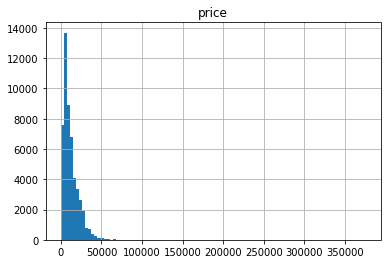

In [25]:
 # funcion para mostrar un histograma
def histo_fun(col):
  
    return df.hist( col, bins=100)

#histograma de los precios

histo_fun('price')



Se puede observar que todos los precios estan concentrados en valores menores a 50000 (aprox),y a partir de 70000(aprox) el histograma muestra valores mínimos casi cero. Ademas observo, una grann cantidad de valores Son valores extraños ya que un auto con precio tan bajo  es poco real. 


array([[<AxesSubplot:title={'center':'years_old'}>]], dtype=object)

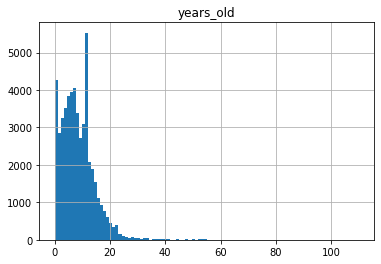

In [26]:
# Histograma mostrando los años que tenian los autos cuando se anunciaron 
histo_fun('years_old')

Se observa que tiene los autos en su mayoria tienen menos de 20 años y que tambien hay valores atipicos que 
extienden la cola del histograma. Tambien observamos que el numero de autos con 0 años es alto, es decir son vendidos el año que son comprados, probablemente sean autos nuevos o casi nuevos.


array([[<AxesSubplot:title={'center':'miles_mean'}>]], dtype=object)

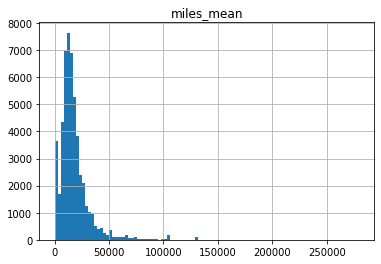

In [27]:
# Histograma del millaje promedio del vehículo por año
histo_fun('miles_mean')

En promedio los vehiculos han recorrido menos de 50000 millas por año. Se pueden observar que a partir de 150000 los datos de hacen casi cero, es decir la mayoria de autos no han recorrido mas de este millaje. 

array([[<AxesSubplot:title={'center':'cylinders'}>]], dtype=object)

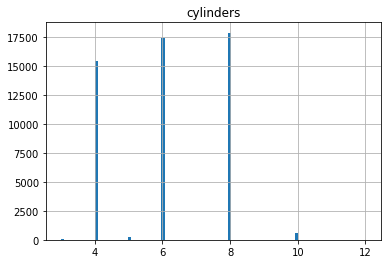

In [28]:
# Histograma de número de cilindros de los autos 
histo_fun('cylinders')

Se puede ver que la distribución esta concentrada en los valores (4,6,8).

array([[<AxesSubplot:title={'center':'condition'}>]], dtype=object)

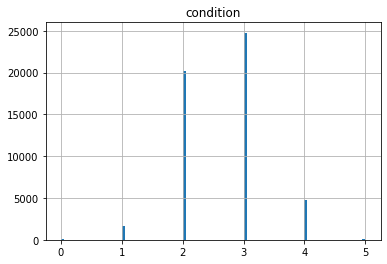

In [29]:
# Histograma de la condición de los autos
histo_fun('condition')


Los valores de estan en el tipo de condición 2 y 3. Estos datos muestran una distribución mas uniforme.

## Estudiar y tratar valores atípicos


In [30]:
#Función para hallar limites
def limite(df,column,x1,y1):

    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    plt.ylim(x1,y1)
    
    plt.hlines(y= Q1-1.5*IQR, xmin=0.9, xmax=1.1, color='red') 
    plt.hlines(y= Q3+1.5*IQR, xmin=0.9, xmax=1.1, color='red')
    df.boxplot(column)
 
    print('Estadistica descriptiva')
    print('                               ')
    print(df[column].describe())

    print('                               ')

    print('Limite superior:', Q3+1.5*IQR)
    print('Limite inferior:', Q1-1.5*IQR)

Estadistica descriptiva
                               
count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64
                               
Limite superior: 34597.5
Limite inferior: -12758.5


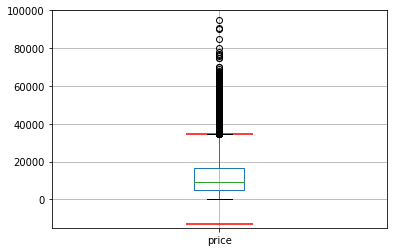

In [31]:
# Límites inferiores y superiores para la columna precio
limite(df,'price',-15000,100000)

El diagrama nos indica que exiten valores atipicos, por encima del limite superior. Se puede observar que los valores se van alejando a partir del limite superior.  

Estadistica descriptiva
                               
count    51525.000000
mean         8.513906
std          6.112976
min          0.000000
25%          4.000000
50%          8.000000
75%         12.000000
max        110.000000
Name: years_old, dtype: float64
                               
Limite superior: 24.0
Limite inferior: -8.0


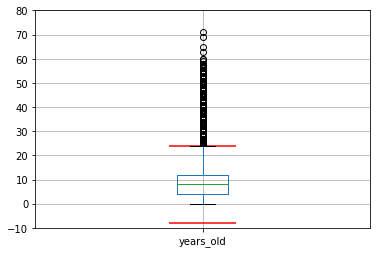

In [32]:
#Limite inferior y superior para antiguedad del auto(años)

limite(df,'years_old',-10,80)


Se observan valores atipicos a partir del limite superior 24.

Estadistica descriptiva
                               
count     51525.000000
mean      17507.888481
std       14737.618819
min           0.000000
25%        9769.000000
50%       14512.000000
75%       21000.000000
max      279365.000000
Name: miles_mean, dtype: float64
                               
Limite superior: 37846.5
Limite inferior: -7077.5


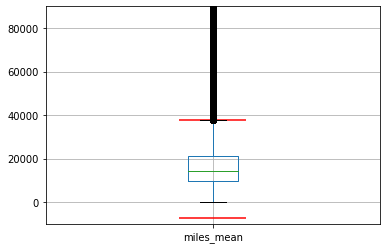

In [33]:
#limite inferior y superior millaje promedio por año

limite(df,'miles_mean',-10000,90000)


Estadistica descriptiva
                               
count    51525.000000
mean         2.637535
std          0.712447
min          0.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: condition, dtype: float64
                               
Limite superior: 4.5
Limite inferior: 0.5


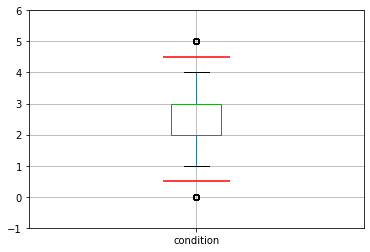

In [34]:
#Limite inferior y superior del estado del auto.
limite(df,'condition',-1,6)


Estadistica descriptiva
                               
count    51525.000000
mean         6.130810
std          1.658414
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64
                               
Limite superior: 14.0
Limite inferior: -2.0


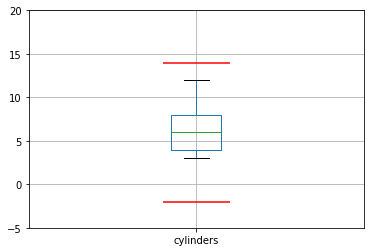

In [35]:
#Limites inferior y superior de la columna cilindros
limite(df,'cylinders',-5,20)



In [36]:
# Almacena los datos sin valores atípicos en un DataFrame separado

df_limpio= df.query('10<price<=40000 and years_old<=24 and 0.5<=condition<=4.5 and miles_mean<= 40000')


print(df_limpio.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 46384 entries, 0 to 51524
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         46384 non-null  int64         
 1   model_year    46384 non-null  int64         
 2   model         46384 non-null  object        
 3   condition     46384 non-null  int64         
 4   cylinders     46384 non-null  int64         
 5   fuel          46384 non-null  object        
 6   odometer      46384 non-null  int64         
 7   transmission  46384 non-null  object        
 8   type          46384 non-null  object        
 9   paint_color   46384 non-null  object        
 10  is_4wd        46384 non-null  bool          
 11  date_posted   46384 non-null  datetime64[ns]
 12  days_listed   46384 non-null  int64         
 13  year_posted   46384 non-null  int64         
 14  years_old     46384 non-null  int64         
 15  miles_mean    46384 non-null  int64 

El nuevo Dataframe no contiene valores atipicos, use los limites calculados para limpiar los valores atipicos.
Las columnas que contenian valores atipicos eran price, mile_mean, codition y years old.  
La columna cylinder no presenta valores atipicos.


## Estudiar parámetros principales sin valores atípicos

Text(0.5, 0, 'Años del vehículo')

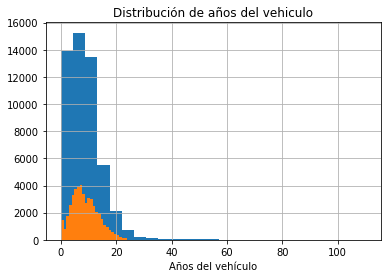

In [37]:
df['years_old'].hist(bins=25)
df_limpio['years_old'].hist(bins=25) 
plt.title('Distribución de años del vehiculo')
plt.xlabel('Años del vehículo')


El histograma nos muestra que luego de la limpieza, los datos se distribuyen de manera mas uniforme y ya no incluyen valores considerados atipicos en la sección anterior. Los valores de cero años tambien han disminuido 

Text(0.5, 0, 'Precio')

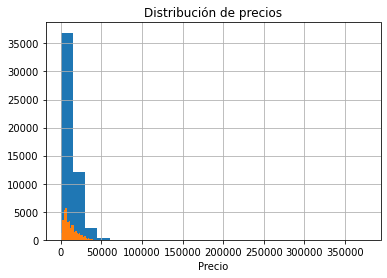

In [38]:
df['price'].hist(bins=25)
df_limpio['price'].hist(bins=25) 
plt.title('Distribución de precios')
plt.xlabel('Precio')


Podemos ver una gran diferencia entre los histogramas, se reducieron los precios y la distribución es mas uniforme.

Text(0.5, 0, 'Condición del vehiculo')

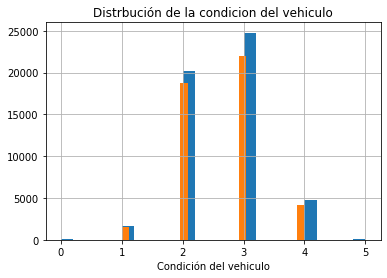

In [39]:
df['condition'].hist(bins=25)
df_limpio['condition'].hist(bins=25) 
plt.title('Distrbución de la condicion del vehiculo')
plt.xlabel('Condición del vehiculo')


Se puede observar que ambos data set son bastante similares. Se eliminaron los valores atipicos y se muestra un histrograma distribuido de manera uniforme.

Text(0.5, 0, 'Millas del vehículo')

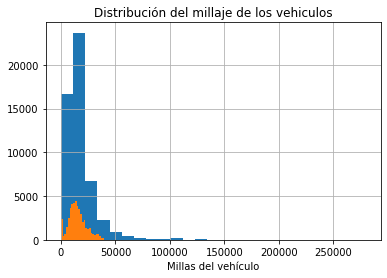

In [40]:
df['miles_mean'].hist(bins=25)
df_limpio['miles_mean'].hist(bins=25) 
plt.title('Distribución del millaje de los vehiculos')
plt.xlabel('Millas del vehículo')


## Periodo de colocación de los anuncios


Distribución de cuantos dias los anuncios fueron mostrados.

Text(0, 0.5, 'Cantidad de anuncios')

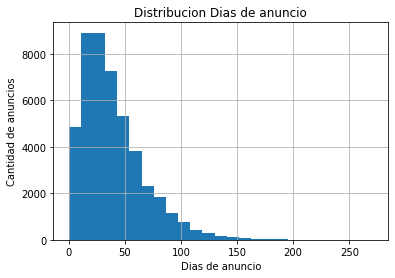

In [41]:
df_limpio['days_listed'].hist(bins=25)
plt.title('Distribucion Dias de anuncio')
plt.xlabel('Dias de anuncio')
plt.ylabel('Cantidad de anuncios')

Estadistica descriptiva
                               
count    46384.000000
mean        39.579726
std         28.262406
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64
                               
Limite superior: 104.0
Limite inferior: -32.0


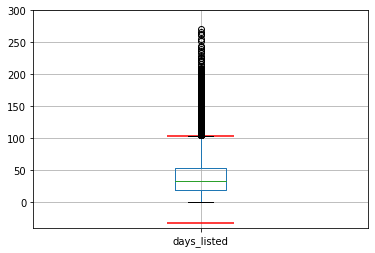

In [42]:
QDAY1 = df_limpio['days_listed'].quantile(0.25)
QDAY3 = df_limpio['days_listed'].quantile(0.75)
IQRDAY = QDAY3 - QDAY1

plt.ylim(-40,300) # establece el rango para el eje vertical
df_limpio.boxplot('days_listed')
plt.hlines(y= QDAY1-1.5*IQRDAY, xmin=0.9, xmax=1.1, color='red') 
plt.hlines(y= QDAY3+1.5*IQRDAY, xmin=0.9, xmax=1.1, color='red') 


print('Estadistica descriptiva')
print('                               ')
print(df_limpio['days_listed'].describe())

print('                               ')

print('Limite superior:', QDAY3+1.5*IQRDAY)
print('Limite inferior:', QDAY1-1.5*IQRDAY)

La mediana nos indica el periodo de colocación habitual de los anuncios, es decir que la mitad de los anuncios se colocan en un tiempo igual o inferior a 33 días. El valor máximo es de 271 días, lo que sugiere que algunos anuncios pueden tardar hasta 9 meses en colocarse.El histograma nos da una luz de que existen valores anormales y con el diagrama de bigotes comprobamos que a partir de 104 dias se consideran publicaciones con un tiempo anormalmente largos. Por otro lado un 25% de los anuncios son eliminados en menos de 19 dias lo que se podria considerar rápido a diferencia de la media de los anuncios.

## Precio promedio por cada tipo de vehículo

[Analiza el número de anuncios y el precio promedio para cada tipo de vehículo. Traza un gráfico mostrando la dependencia de la cantidad de anuncios en cada tipo de vehículo. Selecciona los dos tipos con un mayor número de anuncios.]

En la siguiente tabla se muestra el precio promedio por cada tipo de vehiculo.

In [43]:
precio_prom = df_limpio.pivot_table(
     index= 'type', values='price', aggfunc='median')
print(precio_prom)

             price
type              
SUV           8500
bus          10500
convertible  12980
coupe        12500
hatchback     5900
mini-van      5999
offroad      12500
other         8800
pickup       13695
sedan         5995
truck        14500
van           7990
wagon         7500


En la tabla precio_prom se observa que el precio promedio mayor es para el tipo de auto Truck, pick up y offroad. Pero no podemos determinar si este promedio es por mayor cantidad de autos o por que tiene un precio mayor por el tipo de auto. 


 En la siguientee tabla se muestra el número de anuncios por tipo de vehiculo. 

In [44]:
cant_anuncios = df_limpio['type'].value_counts().reset_index()
cant_anuncios.columns = ['type', 'cantidad']
print(cant_anuncios)

           type  cantidad
0           SUV     11346
1         sedan     11239
2         truck     10732
3        pickup      6304
4         coupe      1885
5         wagon      1479
6      mini-van      1089
7     hatchback       952
8           van       589
9   convertible       335
10        other       227
11      offroad       184
12          bus        23


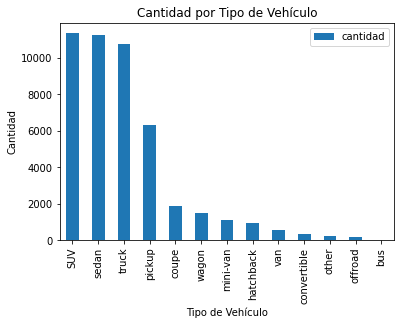

In [45]:
cant_anuncios.plot(x='type', y='cantidad', kind='bar')
plt.title('Cantidad por Tipo de Vehículo')
plt.xlabel('Tipo de Vehículo')
plt.ylabel('Cantidad')
plt.show()

Este diagrama de barras muestra que los dos tipos de vehiculos con mayor cantidad de anuncios son el tipo SUV y sedan. 

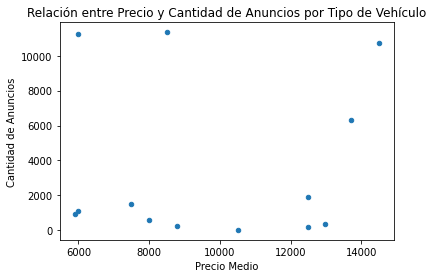

           type  price  cantidad
0           SUV   8500     11346
9         sedan   5995     11239
10        truck  14500     10732
8        pickup  13695      6304
3         coupe  12500      1885
12        wagon   7500      1479
5      mini-van   5999      1089
4     hatchback   5900       952
11          van   7990       589
2   convertible  12980       335
7         other   8800       227
6       offroad  12500       184
1           bus  10500        23


In [46]:
cant_anuncios['type'] = cant_anuncios['type'].astype(str)
df_combinado = pd.merge(precio_prom, cant_anuncios, on='type')
df_combinado.plot.scatter(x='price', y='cantidad')
plt.title('Relación entre Precio y Cantidad de Anuncios por Tipo de Vehículo')
plt.xlabel('Precio Medio')
plt.ylabel('Cantidad de Anuncios')
plt.show()

print(df_combinado.sort_values(['cantidad'],ascending=False))

Con este Grafico de dispersion observamos que los tipos de vehiculo mas anunciados son de tipo SUV y Sedan sin embargo sus precios son menores a la media, por otro lado el tipo Truck tiene el precio promedio mas alto y tambien una mayor cantidad de anuncios.

## Factores de precio

Creare un dataset que incluya solo los 3 tipos de vehiculos mas populares (SUV, sedan y truck) y que incluya solo las columnas que impacten al precio. 


In [47]:

df_suv= df_limpio.query('type=="SUV" or type=="sedan"or type =="truck"')
columnas=['price','years_old','condition','transmission','paint_color','odometer']
df_filtro=df_suv[columnas]

#Cree la matriz de correlacion para verificar la correlacion de las variables numericas
print(df_filtro.corr())

              price  years_old  condition  odometer
price      1.000000  -0.525224   0.245019 -0.427432
years_old -0.525224   1.000000  -0.321710  0.550234
condition  0.245019  -0.321710   1.000000 -0.349858
odometer  -0.427432   0.550234  -0.349858  1.000000


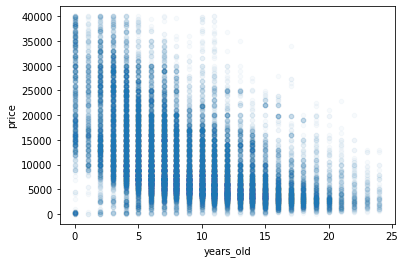

In [48]:
#funcion para crear un grafico de dispersion
def graf_disp(df_filtro,varx,vary):
    df_filtro.plot(x=varx, y=vary, kind='scatter', alpha=0.03)

#Grafico dispersion años vs precio
graf_disp(df_filtro,'years_old','price')

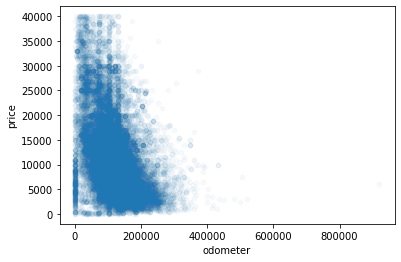

In [49]:
#Grafico dispersion millas vs precio
graf_disp(df_filtro,'odometer','price')

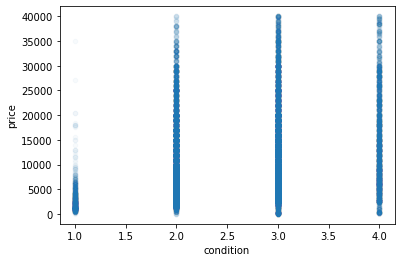

In [50]:
graf_disp(df_filtro,'condition','price')

Podemos ver que la variable de años tiene la correlación con el precio más fuerte de toda la matriz, sin embargo podria ser mas fuerte para afirmar una relacion de causa y efecto. El valor de -0,52 significa que cuando la variable años aumenta, la variable precio tiende a disminuir.

La variable de recorrido(millas) tiene un valor de -0.42 esto significa que cuando una variable aumenta, la otra variable también tiende a disminuir, y la relación entre ellas es moderadamente fuerte.

La correlación de 0.24 entre el precio y la condicion del vehiculo indica una relación positiva débil entre las dos variables.

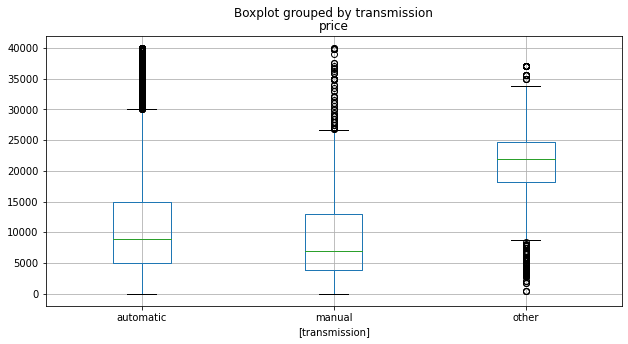

In [51]:
df_limpio.boxplot(column=['price'], by=['transmission'],figsize=(10,5))
plt.show()

In [52]:
df_limpio['transmission'].value_counts()


automatic    42558
manual        2470
other         1356
Name: transmission, dtype: int64

Con el grafico podemos ver que hay una mayor cantidad de vehiculos de tipo automatic y que en promedio su precio es mayor a los otros dos tipos. En el caso del manual en promedio son mas economicossin embargo algunos vehiculos meacanicos son igual de caros que los automaticos.Y en el caso de otros hay vehiculos con precio sbajos pero tambiencn precios muy altos por ello su mediana es mayor. 
En conclusion si hay una relacion precio - transmision aunque podriamos analizar mas variables pra confirmar.

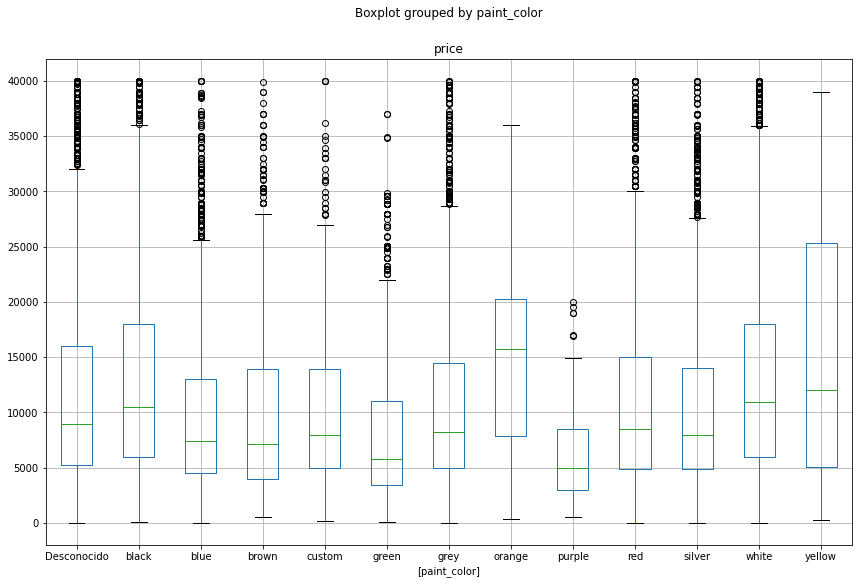

In [53]:
df_limpio.boxplot(column=['price'], by=['paint_color'],figsize=(14,9))
plt.show()

Podemos ver que cada color tiene una distribución de datos distinta segun el precio de los vehiculos. Las mediana es similar en todos los colores, lo que nos indica que el precio no varia demasiado segun el color en promedio. Podria indicar que se deberiamos analizar mas variables para determinar una relacion fuerte precio - color de vehiculo.

## Conclusión general


- Pude encontrar que si exitian valores ausentes en las columnas model_year, cylinders, odometer, paint_color, is_4wd. Reemplaze dichos valores segun cada variable usando hipotesis viables, como lo explico en el apartado 'Valores ausentes'.
- Modifique los tipos de datos a int(), datetime y booleano, segun correspondia para luego usarlos par graficar histogramas y boxplots.
- Añadi columna de years_old, ademas cambie la variable condicion por un rango de numeros Y calcule el promedio de millas por años para facilitar calculos posteriores. 
- Graficque histogramas para conocer la ditribución de los datos, luego con el diagrama de cajas pude identificar los valores atipicos y las medianas de las columnas y asi limpiar mis datos sin eliminar valores relevantes para el analisis.
- Sobre el periodo de colocacion de los anuncios, en promedio demora 33 dias, sin embargo hay anuncios con hasta 271 dias de publicación.
- El precio promedio mas alto son de Truck, pick up y offroad. Y en cantidad de anuncios segun los tipos son SUV y sedan.
- De la variables númericas podemos indicar que hay una correlacion precio - años, . y otra correlacion precio - recorrido(millas). Aunque no sean tan fuertes.
- Con las graficas podria decir que existe una relación entre el precio y el tipo de transmisión, ya que la distribución de los precios es diferente entre los diferentes tipos de transmisión.
- De igual manera con la relacion precio y color, ya que tiene una distribución distinta por color.
